In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import deque
from pathlib import Path

In [3]:
csvs = list( Path('.').rglob('*.csv'))
frames = [pd.read_csv(path) for path in csvs]
print(frames[0].columns)
frames = [f.drop(['Wall time'], axis=1) for f in frames]
labels = ['Chinese Data ', 'Online Hard Example Mining', 'Chinese + American Data', 'Focal Loss']
list(csvs)

Index(['Wall time', 'Step', 'Value'], dtype='object')


[PosixPath('run_ssdlite_start_eval_0-tag-DetectionBoxes_Precision_mAP.csv'),
 PosixPath('run_ssdlite_without_focal_loss_eval_0-tag-DetectionBoxes_Precision_mAP.csv'),
 PosixPath('run_ssdlite_additional_augmentations_eval_0-tag-DetectionBoxes_Precision_mAP.csv'),
 PosixPath('run_american_data_eval_0-tag-DetectionBoxes_Precision_mAP.csv')]

In [4]:
max_len = max(*[len(f['Step']) for f in frames])
max_len

404

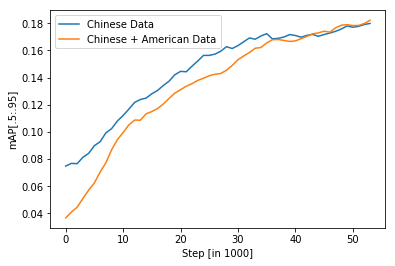

In [5]:
values = deque(maxlen=30)
momentum = .1
# plt.figure(figsize=(16, 12))
# print(len(labels))
min_len = min(*[
    len(f['Step']) for i, f in enumerate(frames)
    if i not in [1, 3]
])
for i, f in enumerate(frames):
    if i in [1, 3]:
        continue
    length = len(f['Value'])
    max_value = np.max(f['Value'])
    to_add = max_len - length
    new_samples = []
    if to_add > 0: 
        new_samples = np.random.normal(max_value, scale=0.01, size=(to_add,)).tolist()
    final_values = f['Value'].values.tolist()
#     final_values = f['Value'].values.tolist() + new_samples
    meaned_values = []
    previous_mean = 0
    for j, val in enumerate(final_values[:min_len]):
        if j == 0:
            previous_mean = val
        else:
            previous_mean = momentum * val + (1 - momentum) * previous_mean
        meaned_values.append(previous_mean)
#     plt.plot(np.arange(0, max_len), meaned_values, label=labels[i])
    plt.plot(np.arange(0,len(meaned_values)), meaned_values, label=labels[i])

plt.ylabel('mAP[.5:.95]')
plt.xlabel('Step [in 1000]')
plt.title('')
plt.legend()
plt.savefig('data.pdf', transparent=True)
plt.show()

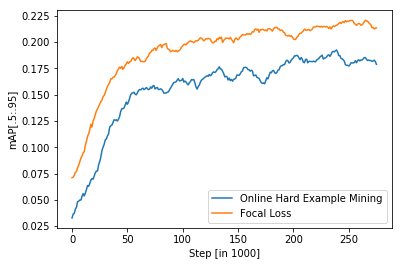

In [6]:
values = deque(maxlen=30)
momentum = .1
# plt.figure(figsize=(16, 12))
# print(len(labels))
min_len = min(*[
    len(f['Step']) for i, f in enumerate(frames)
    if i not in [0, 2]
])
for i, f in enumerate(frames):
    if i in [0, 2]:
        continue
    length = len(f['Value'])
    max_value = np.max(f['Value'])
    to_add = max_len - length
    new_samples = []
    if to_add > 0: 
        new_samples = np.random.normal(max_value, scale=0.01, size=(to_add,)).tolist()
    final_values = f['Value'].values.tolist()
#     final_values = f['Value'].values.tolist() + new_samples
    meaned_values = []
    previous_mean = 0
    for j, val in enumerate(final_values[:min_len]):
        if j == 0:
            previous_mean = val
        else:
            previous_mean = momentum * val + (1 - momentum) * previous_mean
        meaned_values.append(previous_mean)
#     plt.plot(np.arange(0, max_len), meaned_values, label=labels[i])
    plt.plot(np.arange(0,len(meaned_values)), meaned_values, label=labels[i])

plt.ylabel('mAP[.5:.95]')
plt.xlabel('Step [in 1000]')
plt.title('')
plt.legend()
plt.savefig('learning-method.pdf', transparent=True)
plt.show()